In [2]:
import pandas as pd

#Read the csv File
#Try Common Encodings: As a last resort, you can try common encodings like
#'utf-8', 'latin1', 'ISO-8859-1', etc., and see if any of them successfully decode the file without errors.

df = pd.read_csv('Bundesligadaten.txt', delimiter='\t', encoding='ISO-8859-1', header=None)

df.columns = ['date', 'time', 'localTeam', 'awayTeam', 'score', 'score-HT']


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [4]:
#df['date'].isnull().any()

In [5]:
for column in ('date', 'time'):
     # Check if the column contains NaN values
    if df[column].isnull().any():
        # Fill NaN values with corresponding values from the last row using "forward fill"
        points_table_df[column] = df[column].ffill()

In [6]:

# Split the date Value to create a Day of the Week       
df['DoW'] = df['date'].str.split(',').str[0]
df['date'] = df['date'].str.split(',').str[1]

# Split the score
split_values = df['score'].str.split(':')
df['localTeam-Score'] = split_values.str[0].str[-1]
df['awayTeam-Score'] = split_values.str[1].str[0]

# Split the score to half time
split_values = df['score-HT'].str.split(':')
df['localTeam-SHT'] = split_values.str[0].str[-1]
df['awayTeam-SHT'] = split_values.str[1].str[0]


# Reorder columns
df = df[['DoW', 'date', 'time', 'localTeam', 'awayTeam', 'score', 'localTeam-Score', 'awayTeam-Score', 'score-HT', 'localTeam-SHT', 'awayTeam-SHT']]
df.head(1)

,DoW,date,time,localTeam,awayTeam,score,localTeam-Score,awayTeam-Score,score-HT,localTeam-SHT,awayTeam-SHT
0,Fr,05.08.2022,20:30,Eintracht Frankfurt,- FC Bayern München,1:6,1,6,(0:5),0,5


In [7]:
# Triming Columns
df['score-HT'] = df['score-HT'].str.removeprefix('(').str.removesuffix(')')
df['awayTeam'] = df['awayTeam'].str.removeprefix('- ')
df.head(1)

,DoW,date,time,localTeam,awayTeam,score,localTeam-Score,awayTeam-Score,score-HT,localTeam-SHT,awayTeam-SHT
0,Fr,05.08.2022,20:30,Eintracht Frankfurt,FC Bayern München,1:6,1,6,0:5,0,5


In [8]:
    
# Generate 'NewField' based on comparison of 'Field1' and 'Field2'
df['points-Local'] = df.apply(lambda row: 3 if row['localTeam-Score'] > row['awayTeam-Score'] else (1 if row['localTeam-Score'] == row['awayTeam-Score'] else 0), axis=1)
df['points-Away'] = df.apply(lambda row: 3 if row['awayTeam-Score'] > row['localTeam-Score'] else (1 if row['localTeam-Score'] == row['awayTeam-Score'] else 0), axis=1)

# Reorder columns
df = df[['DoW', 'date', 'time', 'localTeam', 'points-Local', 'awayTeam', 'points-Away', 'score', 'localTeam-Score', 'awayTeam-Score', 'score-HT', 'localTeam-SHT', 'awayTeam-SHT']]
df

,DoW,date,time,localTeam,points-Local,awayTeam,points-Away,score,localTeam-Score,awayTeam-Score,score-HT,localTeam-SHT,awayTeam-SHT
0,Fr,05.08.2022,20:30,Eintracht Frankfurt,0,FC Bayern München,3,1:6,1,6,0:5,0,5
1,Sa,06.08.2022,15:30,1. FC Union Berlin,3,Hertha BSC,0,3:1,3,1,1:0,1,0
2,Sa,06.08.2022,15:30,Bor. Mönchengladbach,3,TSG Hoffenheim,0,3:1,3,1,1:1,1,1
3,Sa,06.08.2022,15:30,FC Augsburg,0,SC Freiburg,3,0:4,0,4,0:0,0,0
4,Sa,06.08.2022,15:30,VfL Bochum,0,FSV Mainz 05,3,1:2,1,2,1:1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Sa,27.05.2023,15:30,Eintracht Frankfurt,0,SC Freiburg,0,:,NaN,NaN,:,(,)
302,Sa,27.05.2023,15:30,Rasenballsport Leipzig,0,FC Schalke 04,0,:,NaN,NaN,:,(,)
303,Sa,27.05.2023,15:30,VfB Stuttgart,0,TSG Hoffenheim,0,:,NaN,NaN,:,(,)
304,Sa,27.05.2023,15:30,VfL Bochum,0,Bayer 04 Leverkusen,0,:,NaN,NaN,:,(,)


In [9]:
blTable_local = df.groupby('localTeam')['points-Local'].sum()
blTable_away = df.groupby('awayTeam')['points-Away'].sum()

In [10]:
concat_df = pd.concat([blTable_local, blTable_away])
concat_df = concat_df.to_frame()
concat_df.info()
concat_df.head(5)


<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1. FC Köln to Werder Bremen
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       36 non-null     int64
dtypes: int64(1)
memory usage: 576.0+ bytes


,0
1. FC Köln,11
1. FC Union Berlin,17
Bayer 04 Leverkusen,11
Bor. Mönchengladbach,18
Borussia Dortmund,16


In [11]:
#Shape is a tuple (attribute) and not a method, so it can't be call
print(concat_df.shape)

concat_df = concat_df.groupby(concat_df.index).sum()
concat_df


(36, 1)


,0
1. FC Köln,17
1. FC Union Berlin,27
Bayer 04 Leverkusen,18
Bor. Mönchengladbach,22
Borussia Dortmund,25
Eintracht Frankfurt,27
FC Augsburg,15
FC Bayern München,34
FC Schalke 04,9
FSV Mainz 05,19


In [12]:
concat_df.reset_index(inplace=True)
concat_df = concat_df.rename(columns={'index': 'Team'})
concat_df = concat_df.rename(columns={0: 'Points' })
print(concat_df.columns)
concat_df

Index(['Team', 'Points'], dtype='object')


,Team,Points
0,1. FC Köln,17
1,1. FC Union Berlin,27
2,Bayer 04 Leverkusen,18
3,Bor. Mönchengladbach,22
4,Borussia Dortmund,25
5,Eintracht Frankfurt,27
6,FC Augsburg,15
7,FC Bayern München,34
8,FC Schalke 04,9
9,FSV Mainz 05,19


In [13]:
pivot_df = concat_df.pivot_table(index='Team', values='Points', aggfunc='sum').reset_index()
print(pivot_df)

                      Team  Points
0               1. FC Köln      17
1       1. FC Union Berlin      27
2      Bayer 04 Leverkusen      18
3     Bor. Mönchengladbach      22
4        Borussia Dortmund      25
5      Eintracht Frankfurt      27
6              FC Augsburg      15
7        FC Bayern München      34
8            FC Schalke 04       9
9             FSV Mainz 05      19
10              Hertha BSC      14
11  Rasenballsport Leipzig      28
12             SC Freiburg      30
13          TSG Hoffenheim      18
14           VfB Stuttgart      14
15              VfL Bochum      13
16           VfL Wolfsburg      23
17           Werder Bremen      21


In [14]:
# merge_df = pd.merge(blTable_local[['localTeam', 'points-Local']], blTable_away, how='inner', left_on='localTeam', right_on='awayTeam')
merge_df = pd.merge(blTable_local, blTable_away, how='inner', left_on='localTeam', right_on='awayTeam')
merge_df

,points-Local,points-Away
0,11,6
1,17,10
2,11,7
3,18,4
4,16,9
5,13,14
6,5,10
7,17,17
8,7,2
9,7,12


In [15]:
#######Deprecated since problem fixed in concatenation##########
# # # Remove duplicate entries for the same team
# # unique_teams_df = concat_df.drop_duplicates(subset=['Team'])

# # # Group by the 'Team' column and sum the 'Points'
# # unique_teams_df['Team']= unique_teams_df['Team'].str.strip()

In [16]:
bl_positionsTB = concat_df.groupby('Team')['Points'].sum().reset_index().sort_values('Points', ascending=False)
bl_positionsTB

,Team,Points
7,FC Bayern München,34
12,SC Freiburg,30
11,Rasenballsport Leipzig,28
1,1. FC Union Berlin,27
5,Eintracht Frankfurt,27
4,Borussia Dortmund,25
16,VfL Wolfsburg,23
3,Bor. Mönchengladbach,22
17,Werder Bremen,21
9,FSV Mainz 05,19


In [17]:
concat_df.groupby('Team')['Points'].sum().reset_index().sort_values('Points', ascending=False)


,Team,Points
7,FC Bayern München,34
12,SC Freiburg,30
11,Rasenballsport Leipzig,28
1,1. FC Union Berlin,27
5,Eintracht Frankfurt,27
4,Borussia Dortmund,25
16,VfL Wolfsburg,23
3,Bor. Mönchengladbach,22
17,Werder Bremen,21
9,FSV Mainz 05,19


In [18]:
# blTable_local.merge(blTable_away, left_on='lkey')
points_table_df = pd.concat([blTable_local, blTable_away], axis=1)

In [19]:
# points_table = points_table_df.groupby['points-Away'].sum()
points_table_df.index.name = 'Team'
points_table_df

,points-Local,points-Away
Team,,
1. FC Köln,11,6
1. FC Union Berlin,17,10
Bayer 04 Leverkusen,11,7
Bor. Mönchengladbach,18,4
Borussia Dortmund,16,9
Eintracht Frankfurt,13,14
FC Augsburg,5,10
FC Bayern München,17,17
FC Schalke 04,7,2


In [20]:
# # Fill NaN values with 0
# points_table_df.fillna(0, inplace=True)

# Sum points across both 'points-Local' and 'points-Away' columns
points_table_df['Total Points'] = points_table_df['points-Local'] + points_table_df['points-Away']

# Reset index to make 'Team' a regular column
points_table_df.reset_index(inplace=True)
points_table_df


,Team,points-Local,points-Away,Total Points
0,1. FC Köln,11,6,17
1,1. FC Union Berlin,17,10,27
2,Bayer 04 Leverkusen,11,7,18
3,Bor. Mönchengladbach,18,4,22
4,Borussia Dortmund,16,9,25
5,Eintracht Frankfurt,13,14,27
6,FC Augsburg,5,10,15
7,FC Bayern München,17,17,34
8,FC Schalke 04,7,2,9
9,FSV Mainz 05,7,12,19


In [21]:
bundesliga_Table_df = points_table_df.groupby('Team')['Total Points'].sum().astype(int).to_frame()
# bundesliga_Table.info()
# # If you want to reset the index and make 'Team' a regular column, you can use the reset_index() method:
bundesliga_Table_df.reset_index(inplace=True)

bundesliga_Table_df.sort_values(by=['Total Points'], ascending=False)
bundesliga_Table_df['Team'].unique()
# bundesliga_Table_df = bundesliga_Table_df.groupby('Team')['Total Points'].sum()
# bundesliga_Table_df

array(['1. FC Köln', '1. FC Union Berlin', 'Bayer 04 Leverkusen',
       'Bor. Mönchengladbach', 'Borussia Dortmund', 'Eintracht Frankfurt',
       'FC Augsburg', 'FC Bayern München', 'FC Schalke 04',
       'FSV Mainz 05', 'Hertha BSC', 'Rasenballsport Leipzig',
       'SC Freiburg', 'TSG Hoffenheim', 'VfB Stuttgart', 'VfL Bochum',
       'VfL Wolfsburg', 'Werder Bremen'], dtype=object)

In [22]:
bundesliga_Table_df['Team']


0                 1. FC Köln
1         1. FC Union Berlin
2        Bayer 04 Leverkusen
3       Bor. Mönchengladbach
4          Borussia Dortmund
5        Eintracht Frankfurt
6                FC Augsburg
7          FC Bayern München
8              FC Schalke 04
9               FSV Mainz 05
10                Hertha BSC
11    Rasenballsport Leipzig
12               SC Freiburg
13            TSG Hoffenheim
14             VfB Stuttgart
15                VfL Bochum
16             VfL Wolfsburg
17             Werder Bremen
Name: Team, dtype: object

Plotting Session

<Axes: >

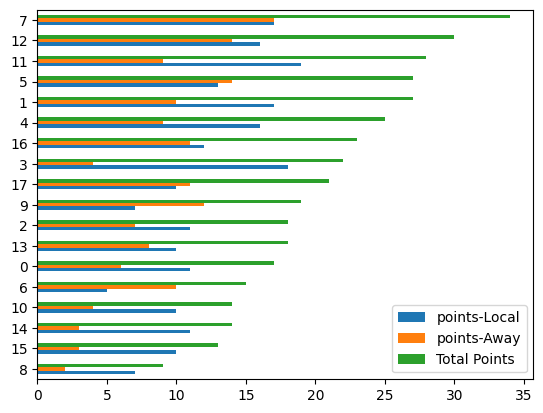

In [57]:
points_table_df = points_table_df.sort_values(by='Total Points')
points_table_df.plot.barh()

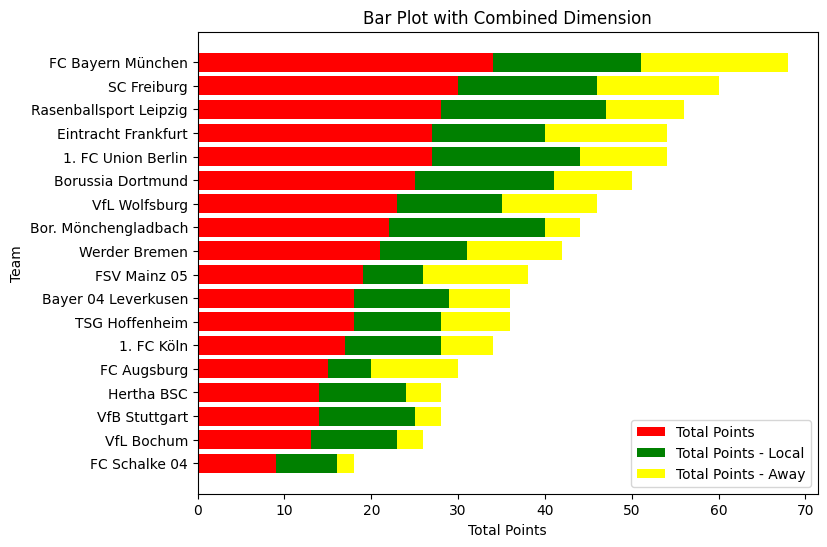

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.barh(points_table_df['Team'], points_table_df['Total Points'],  color='red', label='Total Points')
plt.barh(points_table_df['Team'], points_table_df['points-Local'],  color='green', label='Total Points - Local', left=points_table_df['Total Points'])
plt.barh(points_table_df['Team'], points_table_df['points-Away'],  color='Yellow', label='Total Points - Away', left=points_table_df['Total Points'] + points_table_df['points-Local'])
# plt.barh(df['Combined'], df['Value1'], color='blue', label='Value1')
# plt.barh(df['Combined'], df['Value2'], color='red', label='Value2', left=df['Value1'])
plt.xlabel('Total Points')
plt.ylabel('Team')
plt.title('Bar Plot with Combined Dimension')
plt.legend()
plt.show()

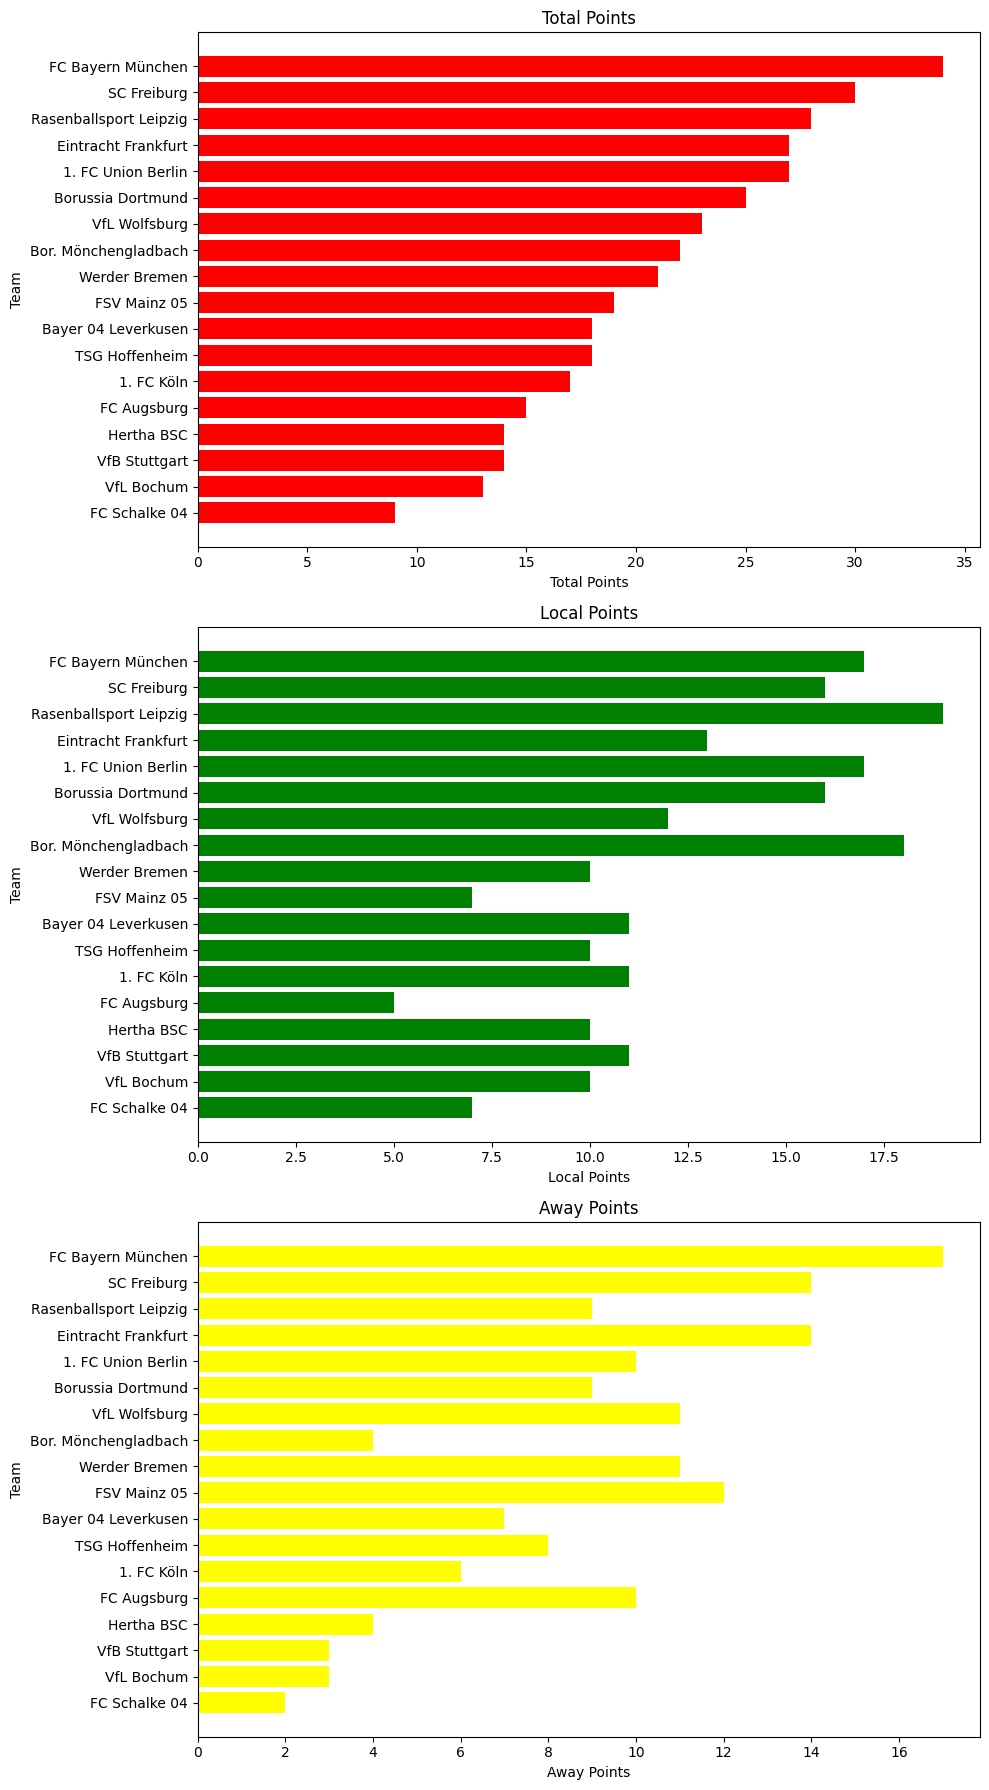

In [59]:
# Create separate subplots for each category
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

# Plot Total Points
ax[0].barh(points_table_df['Team'], points_table_df['Total Points'], color='red')
ax[0].set_xlabel('Total Points')
ax[0].set_ylabel('Team')
ax[0].set_title('Total Points')

# Plot Local Points
ax[1].barh(points_table_df['Team'], points_table_df['points-Local'], color='green')
ax[1].set_xlabel('Local Points')
ax[1].set_ylabel('Team')
ax[1].set_title('Local Points')

# Plot Away Points
ax[2].barh(points_table_df['Team'], points_table_df['points-Away'], color='yellow')
ax[2].set_xlabel('Away Points')
ax[2].set_ylabel('Team')
ax[2].set_title('Away Points')

plt.tight_layout()
plt.show()

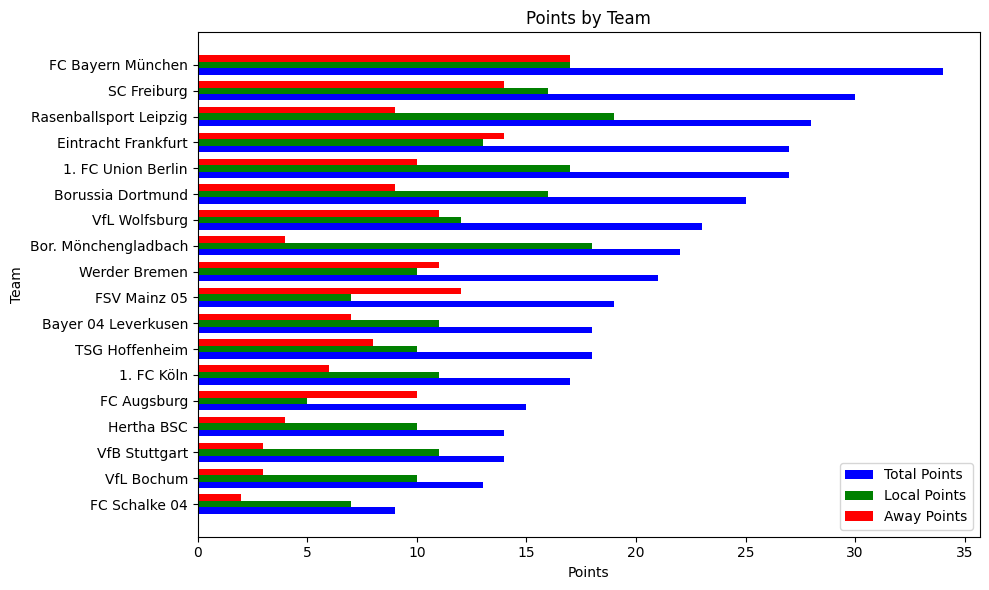

In [61]:
import numpy as np

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
index = np.arange(len(points_table_df))

# Plot
plt.figure(figsize=(10, 6))

plt.barh(index, points_table_df['Total Points'], bar_width, color='blue', label='Total Points')
plt.barh(index + bar_width, points_table_df['points-Local'], bar_width, color='green', label='Local Points')
plt.barh(index + 2*bar_width, points_table_df['points-Away'], bar_width, color='red', label='Away Points')

# Labeling
plt.xlabel('Points')
plt.ylabel('Team')
plt.title('Points by Team')
plt.xticks()
plt.yticks(index + bar_width, points_table_df['Team'])
plt.legend()

plt.tight_layout()
plt.show()